## What is OWASP?
OWASP stands for the Open Web Application Security Project, an online community that produces articles, methodologies, documentation, tools, and technologies in the field of web application security.

## What is the OWASP Top 10?
OWASP Top 10 is the list of the 10 most common application vulnerabilities. It also shows their risks, impacts, and countermeasures. Updated every three to four years, the latest OWASP vulnerabilities list was released in 2017. Let’s dive into it!

##The Top 10 OWASP vulnerabilities in 2021 are:

*   Injection.
*   Broken authentication.
*   Sensitive data exposure.
*   XML external entities (XXE)
*   Broken access control.
*   Security misconfigurations.
*   Cross site scripting (XSS)
*   Insecure deserialization.
*   Using components with known vulnerabilities
*   Insufficient logging and monitoring



# Extracting all possible links for a web page for the web crawling

In [ ]:
!pip install sentence-transformers
!pip install huggingface-hub==0.0.12

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
nltk.download("words")

import requests #for making HTTP requests in Python
from bs4 import BeautifulSoup # pulling data from HTML or XML files


def get_urls(url):
  r = requests.get(url)

  soup = BeautifulSoup(r.text, "html.parser") # Using BeautifulSoup we will parse the web page to extraxt the liks from the page
  # soup
  # print(soup.prettify())

  # Extract the useful liks from list of links
  links = []
  for item1 in soup.find_all('li'):
    for item2 in soup.find_all('a'):
      links.append(item2.get('href'))
  # links </li>
  print(links)


  # Finding the indexed links for Web crawling
  final = []
  for item in links:
    if item != None :
      if len(item) >= 120:
        # stri = item[0:11]
        # if stri == "/vuln/search/":
        final.append(item)
  return final

# urls_list = get_urls(initial_url)

# Web Crawler 
 Extracting the text from a web page 

In [35]:
import gensim
# Operating System
import os
# Regular Expression
import re
# nltk packages
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
# Basic Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# PCA Package
from sklearn.decomposition import PCA
stemmer = SnowballStemmer("english")
from nltk.tokenize import word_tokenize, sent_tokenize

# !pip install sentence-transformers
# !pip install huggingface-hub==0.0.12
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# download the stopword for the english
stopWords = pd.read_csv('stopwords.txt').values


# define the function to get the text from the url
def crawler(url):
    webpage = requests.get(url)
    webpagetext = BeautifulSoup(webpage.text, "html.parser")
    all_p = webpagetext.find_all('p')
    text = ""
    for item in all_p:
        text = text + item.get_text()
    return text
wiki_text = crawler(url_wiki)

class MySentences(object):
    def __init__(self, fnamelist):
        self.fnamelist = fnamelist
        # Creating a set of vocabulary
        self.vocabulary = set([])

    def __iter__(self):
        for fname in self.fnamelist:
            for line in open(fname, encoding='latin1'):
                # Find all the words that has letters from 2 - 15. If the words are longer than that ignore.
                words = re.findall(r'(\b[A-Za-z][a-z]{2,15}\b)', line)
                # Stemming a word.
                words = [ stemmer.stem(word.lower()) for word in words if not word.lower() in stopWords]
                for word in words:
                    self.vocabulary.add(word)
                yield words
model = SentenceTransformer('bert-base-nli-mean-tokens')
def get_reward(url, wiki_url):
    # web crawling, get the text for the both link 
    url_text = crawler(url)
    wiki_text = crawler(wiki_url)

    # tokenized the text of  both websites
    tokenized_url_text = sent_tokenize(url_text)
    tokenized_wiki_text = sent_tokenize(wiki_text)
    sentences = [tokenized_url_text, tokenized_wiki_text]
    # sentences = [tokenized_nvd, tokenized_wiki]
    return sentences
# sentences = get_reward(url, url_wiki)	    
# sentences_url_text = MySentences(sentences[0]) # a memory-friendly iterator
# sentences_wiki_text = MySentences(sentences[1]) # a memory-friendly iterator    
# # sentences = [tokenized_nvd, tokenized_wiki]
# model = SentenceTransformer('bert-base-nli-mean-tokens')
# sentence_embeddings = model.encode(sentences)
# # sentence_embeddings.shape ##


# similarity = cosine_similarity( 
#     [sentence_embeddings[0]],
#     sentence_embeddings[1:])
# similarity
# sentence_embeddings = model.encode(sentences)
# similarity = cosine_similarity( [sentence_embeddings[0]], sentence_embeddings[1:])



# sentences_nvd = MySentences(text_nvd) # a memory-friendly iterator 
# sentences_wiki = MySentences(text_wiki) # a memory-friendly iterator 



# text_nvd = crawler(url_nvd)    # input nvd url for the keyword e.g., Injection, return the text from the nvd website
# text_wiki = crawler(url_wiki)  # input wiki url for the keyword e.g., Injection, return the text from the wiki website

# tokenized_nvd = sent_tokenize(text_nvd)
# tokenized_wiki = sent_tokenize(text_wiki)



# sentences_nvd = MySentences(tokenized_nvd) # a memory-friendly iterator
# sentences_wiki = MySentences(tokenized_wiki) # a memory-friendly iterator

# # # Initialize our model:
# # from sentence_transformers import SentenceTransformer
# # from sklearn.metrics.pairwise import cosine_similarity


# model = SentenceTransformer('bert-base-nli-mean-tokens')

# sentences = [sentences_nvd, sentences_wiki]
# sentence_embeddings = model.encode(sentences)
# # sentence_embeddings.shape ##

# # calculate the similarity for the text
# # Let's calculate cosine similarity for sentence 0:
# similarity = cosine_similarity( 
#     [sentence_embeddings[0]],
#     sentence_embeddings[1:])
# similarity

# Rainforcement method for crawling

## **ϵ (epsilon)-greedy algorithm**
One very famous approach to solving reinforcement learning problems is the ϵ (epsilon)-greedy algorithm, such that, with a probability ϵ, you will choose an action a at random (exploration), and the rest of the time (probability 1−ϵ) you will select the best lever based on what you currently know from past plays (exploitation). So most of the time you play greedy, but sometimes you take some risks and choose a random lever and see what happens.

First, import the necessary libraries and modules required to implement the algorithm.

We'll be solving the 10-pages visited one time, hence n = 10. is a numpy array of length n filled with random floats that can be understood as probabilities of action of that page.


The reward functions work as such - for each page, you run a loop of 10 iterations, and generate a random float every time. If this random number is less than the probability of that arm, you'll add a 1 to the reward. After all iterations, you'll have a value between 0 to 10.

['https://nvd.nist.gov', 'https://www.nist.gov', '#', '/general', '/general/nvd-dashboard', '/general/news', '/general/email-list', '/general/faq', '/general/visualizations', '/vuln', '/vuln/search', '/vuln/full-listing', '/vuln/categories', '/vuln/data-feeds', '/vuln/vendor-comments', '/vuln/cvmap', '/vuln-metrics/cvss#', '/vuln-metrics/cvss/v3-calculator', '/vuln-metrics/cvss/v2-calculator', '/products', '/products/cpe', '/products/cpe/search', '/products/cpe/statistics', '/products/swid', '/info', '/other', 'https://ncp.nist.gov', 'https://ncp.nist.gov/cce', 'https://csrc.nist.gov/Projects/risk-management/sp800-53-controls/release-search#!/800-53', 'https://csrc.nist.gov/projects/scap-validation-program', 'https://csrc.nist.gov/projects/security-content-automation-protocol', 'https://csrc.nist.gov/projects/united-states-government-configuration-baseline', '/search', '/vuln/search', '/products/cpe/search', 'https://www.nist.gov/itl', '/', None, '/vuln', '/vuln/search', '/vuln/search?

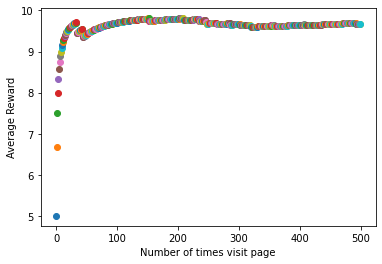

In [39]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup # pulling data from HTML or XML files
import requests #for making HTTP requests in Python
# from get_urls import get_urls
# from get_reward import crawler, MySentences
initial_url = 'https://nvd.nist.gov/vuln/search/results?form_type=Basic&results_type=overview&query=Injection&search_type=all&isCpeNameSearch=false'
# urls = 'https://nvd.nist.gov'
url_wiki = 'https://en.wikipedia.org/wiki/SQL_injection'
wiki_text = crawler(url_wiki)
# get the list of url to visit for web crawling
urls_list = get_urls(initial_url)
print('finas list of url, used for crawling: https://nvd.nist.gov + ', urls_list)
# calculate the similarity/ reward 
# reward = get_reward(url, url_wiki)

url =  'https://nvd.nist.gov' + urls_list[1] 
sentences = get_reward(url, url_wiki)	    
sentences_url_text = MySentences(sentences[0]) # a memory-friendly iterator
sentences_wiki_text = MySentences(sentences[1]) # a memory-friendly iterator    
# sentences = [tokenized_nvd, tokenized_wiki]
model = SentenceTransformer('bert-base-nli-mean-tokens')
sentence_embeddings = model.encode(sentences)
# sentence_embeddings.shape ##
# similarity /reward
similarity = cosine_similarity( [sentence_embeddings[0]],
    sentence_embeddings[1:])

np.random.seed(5)    
n = 10 # no of pages fro start
arms = np.random.rand(n) # initial random values for the 10 websites

eps = 0.1 #probability of exploration action, goto next page
# defining the reward using similarity of the visited page and wiki page

# calcuate the similarity between the wiki taxt and NVD text for the same sequrity issue 
s = similarity
def reward(prob):
    reward = 0
    for i in range(10):
        
        if similarity[0][0] > prob:
            reward += 1
    return reward
#initialize memory array; has 1 row defaulted to random action index
av = np.array([np.random.randint(0,(n+1)), 0]).reshape(1,2) #av = action-value
#greedy method to select best page based on memory array
def bestPage(a):
    bestPage = 0 #default to 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:,0] == u[0])][:, 1]) #calculate mean reward for each action
        if bestMean < avg:
            bestMean = avg
            bestPage = u[0]
    return bestPage

# plot the rewards and the visit of the page     
plt.xlabel("Number of times visit page")
plt.ylabel("Average Reward")
for i in range(500):
    if random.random() > eps: #greedy exploitation action
        choice = bestPage(av)
        thisAV = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0)
    else: #exploration action
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice])]]) #choice, reward
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)